# Movies

### I am a very big fan of movies, and I want to be able to demonstrate that through this project while also showing off dataframe/pandas skills acquired in class.

### The dataframes I will be using can be found at https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/. I started by downloading those csv files into a folder in my google drive and I am making them into a dataframe from there, like done in previous assignments.

In [ ]:
import csv
import pandas as pd
import numpy as np
from google.colab import drive
import json

drive.mount('/content/drive')

file = '/content/drive/My Drive/Colab Notebooks/Movie_data/movies_metadata.csv'

data = open(file,'r')

movie_df = pd.read_csv(data,parse_dates=['release_date'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-fe13d21cdc1e>:13: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_df = pd.read_csv(data,parse_dates=['release_date'])


In [ ]:
movie_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### The first thing I want to know about my dataframe is how many rows and columns it has, so I will do just that.

In [ ]:
r,c = movie_df.shape
print('In the first dataframe I have {} rows and {} columns'.format(r,c))

In the first dataframe I have 45466 rows and 24 columns


### Now by looking at the number of columns I can see there are 24 columns. However, I can't see all of their names from just the head of the dataframe. Therefore I will print out all the column names and check their respective data types.

In [ ]:
movie_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

### Now before going any further into my analysis, I don't like that the index is showing on the dataframe, so I'm going to replace those numbers with the movie titles, which I know are in a column called 'title'.

In [ ]:
title_index = movie_df.set_index('title', drop=True, append=False, inplace=False, verify_integrity=False)
title_index.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
Jumanji,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
Grumpier Old Men,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
Waiting to Exhale,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
Father of the Bride Part II,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0


### Now that that's fixed and the titles of the movies are much more visible, I want to know if one of my favourite movies of all time is in this dataframe: "No Country for Old Men". A movie with amazing suspense and action sequences, with essential themes of inevitability of death, aging and fate. The movie has amazing performances all around, but Javier Bardem performance stands out, as he played one of the best villains ever in cinema.

In [ ]:
title_index.loc['No Country for Old Men']

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                            25000000
genres                   [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
homepage                                                               NaN
id                                                                    6977
imdb_id                                                          tt0477348
original_language                                                       en
original_title                                      No Country for Old Men
overview                 Llewelyn Moss stumbles upon dead bodies, $2 mi...
popularity                                                       15.565484
poster_path                               /6o0UWX2naW7HK45PDNYmoMIk5qs.jpg
production_companies     [{'name': 'Miramax Films', 'id': 14}, {'name':...
production_countries     

### I am glad the movie is here. Now that I look at this closely, there are columns here that do not interest me in terms of the questions I am trying to ask and information I am trying to get and simply ones that I don't want there:
 - the video column, because I have no idea what it does
 - the original_title column, because it is a little redundant
 - the imdb_id, since it is easier to go to IMDB by looking up the movie title, not the id
 - the adult column, as it is useless


In [ ]:
title_index_dropped = title_index.drop(['video','original_title','imdb_id','adult'],axis=1)

### Perfect. Now, being a movie fan, I have a very good idea of what the movie ratings are, therefore, I want to order this dataframe by the vote_average column, which is the average rating given by users, and see if it matches up.

In [ ]:
title_index_dropped.sort_values('vote_average', ascending=False).head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
Ice Age Columbus: Who Were the First Americans?,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,320849,en,Firmly rooted in the latest scientific discove...,0.043244,/mzEy02GOD5i2BNs15ma06vhO3uu.jpg,[],[],2005-01-01,0.0,0.0,[],Released,NaN,10.0,1.0
If God Is Willing and da Creek Don't Rise,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96451,en,"In 2006, director Spike Lee created an astonis...",0.109599,/d0eQy5xYxZnJsVYhRic8aIX0lA2.jpg,"[{'name': '40 Acres & A Mule Filmworks', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-08-23,0.0,255.0,[],Released,NaN,10.0,1.0
Meat the Truth,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,72123,en,Meat the Truth is a high-profile documentary w...,0.09108,/ANTsGDien6MwXKndxObZQIoz3c.jpg,[],[],2008-10-03,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,10.0,1.0
Marvin Hamlisch: What He Did For Love,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.marvinhamlischmovie.com/,230864,en,When Marvin Hamlisch passed away in August 201...,0.371755,/yJca3h32YP72I31bvqdXubYSuxV.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2013-10-12,0.0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,10.0,1.0
Elaine Stritch: At Liberty,NaN,300000,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...",NaN,140595,en,Judy at the Palace. Sinatra at Carnegie Hall. ...,0.089067,/k4HGhaRWfEl7ZWXuh3Mq2EEG9ER.jpg,"[{'name': 'Pennebaker Hegedus Films, Inc.', 'i...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2002-01-01,0.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Legendary performances come along so rarely.,10.0,1.0


### There is an obvious problem with this, these movies are very very unpopular and one person rated them 10/10. This gives us an unrealistic idea of how good a movie is. Therefore, I will specify the vote count to something reasonable, to have more accurate data, and will use only this dataframe from here.

In [ ]:
popular_movies = title_index_dropped[title_index_dropped['vote_count'] >= 1100]

### The reason the value is a very specific 1100 is because I tested other values and compared to well known movie databases and went up until the top looked as similar as possible.

In [ ]:
popular_movies.sort_values('vote_average', ascending=False).head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
The Godfather,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,en,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,/rPdtLWNsZmAtoZl9PK7S2wE3qiS.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1972-03-14,245066411.0,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,8.5,6024.0
The Shawshank Redemption,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,en,Framed in the 1940s for the double murder of h...,51.645403,/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 9...","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-09-23,28341469.0,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,8.5,8358.0
Whiplash,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,244786,en,"Under the direction of a ruthless instructor, ...",64.29999,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,13092000.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,8.3,4376.0
Schindler's List,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,en,The true story of how businessman Oskar Schind...,41.725123,/yPisjyLweCl1tbgwgtzBCNCBle.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-11-29,321365567.0,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",8.3,4436.0
Life Is Beautiful,NaN,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,637,it,A touching story of an Italian book seller of ...,39.39497,/f7DImXDebOs148U4uPjI61iDvaK.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1997-12-20,229400000.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"An unforgettable fable that proves love, famil...",8.3,3643.0


### Looks like a pretty good list from looking at it, however the ratings all seem to be lower than they are on the IMDB website, which isn't the end all be all of movie ratings, but it is the most popular. I wanted to be able to compare these ratings within my dataframe. However, I would have to pay 150000 dollars to get acces to the IMDB API. So maybe some other time...

### "The Godfather" and "The Shawshank Redemption" are the only movies with an 8.5 rating, and rightfully so, as they are two phenomenal movies. The first completely setting a new standard for Mafia movies, and the second with many iconic scenes and performances, especially from the great Morgan Freeman.

### After those two movies, it drops to 8.3, I wonder how many movies are available here at that rating.

In [ ]:
popular_movies[popular_movies['vote_average'] == 8.3]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
Pulp Fiction,NaN,8000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,680,en,"A burger-loving hit man, his philosophical par...",140.950236,/dM2w364MScsjFf8pfMbaWUcWrR.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-09-10,2.139288e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Just because you are a character doesn't mean ...,8.3,8670.0
Schindler's List,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,en,The true story of how businessman Oskar Schind...,41.725123,/yPisjyLweCl1tbgwgtzBCNCBle.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-11-29,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",8.3,4436.0
One Flew Over the Cuckoo's Nest,NaN,3000000,"[{'id': 18, 'name': 'Drama'}]",NaN,510,en,While serving time for insanity at a state men...,35.529554,/2Sns5oMb356JNdBHgBETjIpRYy9.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1975-11-18,1.089813e+08,133.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"If he's crazy, what does that make you?",8.3,3001.0
Psycho,"{'id': 119674, 'name': 'Psycho Collection', 'p...",806948,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,539,en,When larcenous real estate clerk Marion Crane ...,36.826309,/81d8oyEFgj7FlxJqSDXWr8JH8kV.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1960-06-16,3.200000e+07,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The master of suspense moves his cameras into ...,8.3,2405.0
The Godfather: Part II,"{'id': 230, 'name': 'The Godfather Collection'...",13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,240,en,In the continuing saga of the Corleone crime f...,36.629307,/bVq65huQ8vHDd1a4Z37QtuyEvpA.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1974-12-20,4.754284e+07,200.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"I don't feel I have to wipe everybody out, Tom...",8.3,3418.0
Once Upon a Time in America,NaN,30000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,311,en,A former Prohibition-era Jewish gangster retur...,32.182851,/fqP3Q7DWMFqW7mh11hWXbNwN9rz.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1984-02-16,0.000000e+00,229.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Crime, passion and lust for power - Sergio Leo...",8.3,1104.0
Life Is Beautiful,NaN,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,637,it,A touching story of an Italian book seller of ...,39.39497,/f7DImXDebOs148U4uPjI61iDvaK.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1997-12-20,2.294000e+08,116.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"An unforgettable fable that proves love, famil...",8.3,3643.0
Fight Club,NaN,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,en,A ticking-time-bomb insomniac and a slippery s...,63.869599,/adw6Lq9FiC9zjYEpOqfq03ituwp.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1999-10-15,1.008538e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,8.3,9678.0
Spirited Away,NaN,15000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",http://movies.disney.com/spirited-away,129,ja,A ten year old girl who 

### I won't go in depth about all these movies, but my favorites from that list are "Whiplash", "One Flew Over the Cuckoo's Nest" and "Psycho".

### Looking at all these ratings makes me wonder what really makes a movie good, what makes these ratings higher than others. Especially because I also like rating movies myself and I want to know what affects it, other than overall enjoyment. There can be many many variables to this. Therefore, I want to know if the budget, revenue, runtime, popularity and the genre are connected to the ratings of these movies. I think release date also matters, but I will test that separately later.

### Also, I want to take a look at the popularity column since I don't understand it too well, and I don't know what it is based on. It seems that the higher the value the more popular, but I don't know how accurate it is.

In [ ]:
popular_movies['popularity'] = popular_movies['popularity'].astype(float)

<ipython-input-12-fc4a002b61d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['popularity'] = popular_movies['popularity'].astype(float)


In [ ]:
popular_movies.sort_values('popularity', ascending=False)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
Minions,"{'id': 86066, 'name': 'Despicable Me Collectio...",74000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.minionsmovie.com/,211672,en,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,/q0R4crx2SehcEEQEkYObktdeFy.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,1.156731e+09,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Before Gru, they had a history of bad bosses",6.4,4729.0
Wonder Woman,"{'id': 468552, 'name': 'Wonder Woman Collectio...",149000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.warnerbros.com/wonder-woman,297762,en,An Amazon princess comes to the world of Man t...,294.337037,/imekS7f1OuHyUP2LAiTEM0zBzUz.jpg,"[{'name': 'Dune Entertainment', 'id': 444}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-05-30,8.205804e+08,141.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Power. Grace. Wisdom. Wonder.,7.2,5025.0
Beauty and the Beast,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,321612,en,A live-action adaptation of Disney's version o...,287.253654,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-03-16,1.262886e+09,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,6.8,5530.0
Baby Driver,NaN,34000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,339403,en,After being coerced into working for a crime b...,228.032744,/dN9LbVNNZFITwfaRjl4tmwGWkRg.jpg,"[{'name': 'Big Talk Productions', 'id': 443}, ...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-06-28,2.245113e+08,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All you need is one killer track.,7.2,2083.0
Big Hero 6,NaN,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",http://movies.disney.com/big-hero-6,177572,en,The special bond that develops between plus-si...,213.849907,/9gLu47Zw5ertuFTZaxXOvNfy78T.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-24,6.521054e+08,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,From the creators of Wreck-it Ralph and Frozen,7.8,6289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-Men: First Class,"{'id': 748, 'name': 'X-Men Collection', 'poste...",160000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.x-menfirstclassmovie.com/,49538,en,Before Charles Xavier and Erik Lensherr took t...,0.738633,/7SSm7BfzFoVzmd6fCDccj7qRxc8.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-05-24,3.536241e+08,132.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Witness the moment that will change our world.,7.1,5252.0
Home Alone,"{'id': 9888, 'name': 'Home Alone Collection', ...",18000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.foxconnect.com/home-alone-4.html,771,en,Eight-year-old Kevin McCallister makes the mos...,0.702543,/8IWPBT1rkAaI8Kpk5V3WfQRklJ7.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-11-09,4.766847e+08,103.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Family Comedy Without the Family.,7.1,2487.0
Jurassic Park III,"{'id': 328, 'name': 'Jurassic Park Collection'...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,331,en,"In need of funds for research, Dr. Alan Grant ...",0.648867,/26L7XODsNlxX3VwkfuUnYOslbRF.jpg,"[{'name': 'Universal Studios', 'id': 13}, {'na...","[{'iso_3166_1': 'US', 'n

### From what I can see it has no correlation at all with vote_count, which I find very odd, since a more popular movie would get rated more. And just from looking at these movies, I know for a fact Home Alone should not be THAT low as it is a very very well known movie, and there are many more popular movies than the ones showed at the top.

### From my analysis, I think using this column for my work isn't a great idea as it looks incorrect and inconsistent, therefore I will use vote_count as a column for popularity isntead. So I will also remove this column from the data set.

In [ ]:
popular_movies_df = popular_movies.drop('popularity',axis=1)

### First I am just gonna grab one of these columns, "budget" for example, and I will see what conclusions I can draw from sorting the movies by budget. And to be able to do so, I will have to make this column of the type int. And since I am doing that, I will change other data types that I will need changed in the future.

In [ ]:
popular_movies_df['budget'] = popular_movies_df['budget'].astype(int)

In [ ]:
popular_movies_df['release_date'] = pd.to_datetime(popular_movies_df['release_date'])

In [ ]:
popular_movies_df['id'] = popular_movies_df['id'].astype(int)

In [ ]:
popular_movies_df.sort_values('budget', ascending=False).head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,en,Captain Jack Sparrow crosses paths with a woma...,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,6.4,5068.0
Pirates of the Caribbean: At World's End,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,en,"Captain Barbossa, long believed to be dead, ha...",/bXb00CkHqx7TPchTGG131sWV59y.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",6.9,4627.0
Avengers: Age of Ultron,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,en,When Tony Stark tries to jumpstart a dormant p...,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,7.3,6908.0
Superman Returns,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,en,Superman returns to discover his 5-year absenc...,/e3aLTaD5ppxo3en0GAGceekEPAe.jpg,"[{'name': 'DC Comics', 'id': 429}, {'name': 'L...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-28,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,5.4,1429.0
Transformers: The Last Knight,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,en,"Autobots and Decepticons are at war, with huma...",/s5HQf2Gb3lIO2cRcFwNL9sn1o1o.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-06-21,6.049421e+08,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",6.2,1440.0


###And as we can see the movie with the highest budget here is "Pirates of the Caribbean: On Stranger Tides". I absolutely love the Pirates of the Caribbean trilogy (yes there are 5 movies but the last 2 don't count, as they are just not very good). And as we can see by the rating, it is a 6.4, which isn't the best, and the movies after it are also not very well rated. Therefore, from just this, we know that movies with high budgets aren't good right?

### Obviously not. Because of that the best way I can test this properly is by doing Linear Regression, and setting the y value as the ratings, and looking at the coefficients and see how much the budget affects it, along with the other variables.

### Here I will create a copy of the dataframe simply with the columns that interest me for this, so I don't alter the original dataframe.

In [ ]:
popular_movies_df_copy = popular_movies_df.copy()
pop_int_df = popular_movies_df_copy.drop(['belongs_to_collection','genres','homepage','id','original_language','overview','poster_path','production_companies',
                                       'production_countries','release_date','spoken_languages','status','tagline'],axis=1)
pop_int_df.head()

,budget,revenue,runtime,vote_average,vote_count
title,,,,,
Toy Story,30000000,373554033.0,81.0,7.7,5415.0
Jumanji,65000000,262797249.0,104.0,6.9,2413.0
Heat,60000000,187436818.0,170.0,7.7,1886.0
GoldenEye,58000000,352194034.0,130.0,6.6,1194.0
Casino,52000000,116112375.0,178.0,7.8,1343.0


### Then, I will just min max these values and I will have to decode the json columns and one hot encode them to be able to evaluate them.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = pop_int_df.drop('vote_average',axis=1)
y = popular_movies_df['vote_average']

mms = MinMaxScaler()
vals = mms.fit_transform(X)

cols = X.columns

norm_X = pd.DataFrame(vals,columns=cols)
norm_X.head()

,budget,revenue,runtime,vote_count
0,0.078947,0.133988,0.103030,0.332563
1,0.171053,0.094261,0.242424,0.101195
2,0.157895,0.067231,0.642424,0.060578
3,0.152632,0.126327,0.400000,0.007245
4,0.136842,0.041648,0.690909,0.018728


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
lr = reg.fit(norm_X,y)

lr_cv_results = cross_val_score(lr,norm_X,y,cv=10,scoring='neg_root_mean_squared_error')
print('The average RMSE is: {:.2f}'.format(abs(lr_cv_results.mean())))

The average RMSE is: 0.59


In [ ]:
from sklearn.dummy import DummyRegressor

zeroR = DummyRegressor(strategy='mean')
zr = zeroR.fit(norm_X,y)

zr_cv_results = cross_val_score(zr,norm_X,y,cv=10,scoring='neg_root_mean_squared_error')
print('The average RMSE of ZeroR is: {:.2f}'.format(abs(zr_cv_results.mean())))

The average RMSE of ZeroR is: 0.75


In [ ]:
print('Features : Coefficients')
print('-----------------------')
for i in range(len(lr.coef_)):
  print('{} : {:.4f}'.format(norm_X.columns[i],lr.coef_[i]))

Features : Coefficients
-----------------------
budget : -2.4969
revenue : 0.0619
runtime : 1.6315
vote_count : 2.5467


### These are some interesting results, i seems both vote_count and budget have a pretty great affect to the RMSE compared to the other columns. Runtime also has a good effect, but as we can see a movie making more money barely ever means it is actually better. While clearly, the lower the budget, the better the movie, on average, and higher the vote count, the better the movie is.
### Also, the RMSE from LR is clearly better than the one with ZeroR, which is good.

### I can almost already conclude some stuff from this: lower budget movies ususally include older movies, and therefore on average older movies are better. Also that longer movies seem to be slightly better rated (usually comedies and such are shorter movies, showing that more serious longer movies are usually better), and also that movies that are popular and get rated a lot, also happen to be pretty good movies.

### Now I am going to add genre to this analysis, so first I have to decode the json and one-hot encode it so I can use it.

In [ ]:
import json

def convert_json(j_string):
  if j_string == 'NaN' or not j_string:
    return [];
  # {' and '} and :' and (space)' and ',
  j_string = j_string.replace("{'",'{"')
  j_string = j_string.replace("'}",'"}')
  j_string = j_string.replace(" '",' "')
  j_string = j_string.replace("',",'",')
  j_string = j_string.replace("' ,",'" ,')
  j_string = j_string.replace("':",'":')
  j_string = j_string.replace(" None",'" None"')
  j_string = j_string.replace('""','"')

  try:
    j = json.loads(j_string)
  except Exception as err:
    print(j_string)
    return []
  return j


extracted_cols = movie_df['genres']
extracted_cols2 = extracted_cols.map(convert_json)
norm_x2 = norm_X
norm_X2 = norm_x2.join(extracted_cols2)

norm_X2.head()

,budget,revenue,runtime,vote_count,genres
0,0.078947,0.133988,0.103030,0.332563,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,0.171053,0.094261,0.242424,0.101195,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,0.157895,0.067231,0.642424,0.060578,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,0.152632,0.126327,0.400000,0.007245,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,0.136842,0.041648,0.690909,0.018728,"[{'id': 35, 'name': 'Comedy'}]"


In [ ]:
def clean_json2(x):

    # store values
    ls = []

    # loop through the list f dictionaries
    for y in range(len(x[0])):

        # Access each key and value in each dictionary
        #for k, v in x[0][y].items():
            # append column names to ls
            #ls.append(str(k)+ "_" +str(v))
        ls.append('genre_'+ x[0][y]['name'])

    # create a new column or change 0 to 1 if keyword exists
    for z in range(len(ls)):

        # If column not in the df columns then make a new column and assign zero values while changing the current row to 1
        if ls[z] not in norm_X2.columns:
            norm_X2[ls[z]] = 0
            norm_X2[ls[z]].iloc[x.name] = 1
        else:
            norm_X2[ls[z]].iloc[x.name] = 1
    return

print("Original Shape",norm_X2.shape)

#json_cols = ['genre','belongs_to_collection','production_companies']
json_cols = ['genres']

# Loop over all columns and clean json and create new columns
for x in json_cols:
    norm_X2[[x]].apply(clean_json2, axis=1)

norm_X3 = norm_X2.drop('genres',axis=1)
norm_X3.head()

Original Shape (1016, 5)


,budget,revenue,runtime,vote_count,genre_Animation,genre_Comedy,genre_Family,genre_Adventure,genre_Fantasy,genre_Romance,...,genre_Horror,genre_History,genre_Science Fiction,genre_Mystery,genre_War,genre_Foreign,genre_Music,genre_Documentary,genre_Western,genre_TV Movie
0,0.078947,0.133988,0.103030,0.332563,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.171053,0.094261,0.242424,0.101195,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.157895,0.067231,0.642424,0.060578,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.152632,0.126327,0.400000,0.007245,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.136842,0.041648,0.690909,0.018728,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
lr = reg.fit(norm_X3,y)

lr_cv_results = cross_val_score(lr,norm_X3,y,cv=10,scoring='neg_root_mean_squared_error')
print('The average RMSE is: {:.2f}'.format(abs(lr_cv_results.mean())))

The average RMSE is: 0.59


In [ ]:
from sklearn.dummy import DummyRegressor

zeroR = DummyRegressor(strategy='mean')
zr = zeroR.fit(norm_X3,y)

zr_cv_results = cross_val_score(zr,norm_X3,y,cv=10,scoring='neg_root_mean_squared_error')
print('The average RMSE of ZeroR is: {:.2f}'.format(abs(zr_cv_results.mean())))

The average RMSE of ZeroR is: 0.75


### Even though I didn't expect for there to be no change at all in the RMSE, I did expect it to not change much, because a movie doesn't have to be a specific genre to be good, it is more about the acting, directing, plot, etc. Although I could go through the coeffiecients and pick which genres did affect it the most, I don't think it's worth it as the values are just so so small. Only conclusion I can take from this is that genre really doesn't matter too much in making a good movie.

### Now I want to look into what affects popularity, as we saw popularity, represented as vote_count, has a very big effect on the RMSE according to it's coeffiecient. I wonder if I flip this the vote_average will have a similar effect on popularity as the vote_count did on popularity. I apologize for being repetitive but I will do exactly the same thing as I did with the ratings.

In [ ]:
X2 = pop_int_df.drop('vote_count',axis=1)
y2 = popular_movies_df['vote_count']

mms = MinMaxScaler()
vals = mms.fit_transform(X2)

cols = X2.columns

X2_norm = pd.DataFrame(vals,columns=cols)
X2_norm.head()

,budget,revenue,runtime,vote_average
0,0.078947,0.133988,0.103030,0.813953
1,0.171053,0.094261,0.242424,0.627907
2,0.157895,0.067231,0.642424,0.813953
3,0.152632,0.126327,0.400000,0.558140
4,0.136842,0.041648,0.690909,0.837209


In [ ]:
reg = LinearRegression()
lr = reg.fit(X2_norm,y2)

lr_cv_results2 = cross_val_score(lr,X2_norm,y2,cv=10,scoring='neg_root_mean_squared_error')
print('The average RMSE is: {:.2f}'.format(abs(lr_cv_results.mean())))

The average RMSE is: 0.59


In [ ]:
zeroR = DummyRegressor(strategy='mean')
zr = zeroR.fit(X2_norm,y2)

zr_cv_results2 = cross_val_score(zr,X2_norm,y2,cv=10,scoring='neg_root_mean_squared_error')
print('The average RMSE of ZeroR is: {:.2f}'.format(abs(zr_cv_results.mean())))

The average RMSE of ZeroR is: 0.75


In [ ]:
print('Features : Coefficients')
print('-----------------------')
for i in range(len(lr.coef_)):
  print('{} : {:.4f}'.format(X2_norm.columns[i],lr.coef_[i]))

Features : Coefficients
-----------------------
budget : 1350.4297
revenue : 9515.8287
runtime : 679.1313
vote_average : 3917.6539


### The RMSE is exactly the same, which I expected, however the coef values are very high for some reason, and I don't know, but we can still interpret them as is. By far what matters the most for popularity in general is the revenue, which is a little surprising and very different than what it was for ratings, obviously the more money a movie makes the more popular it is, and also we can conclude that good movies are popular for the most part. In this case budget isn't that much of a factor any more, and runtime still doesn't affect it all, meaning the movie length does not matter in terms of making a popular movie. I wanted to use belongs_to_collection and production_companies for this study too, but the json was too hard to decode so I will go over sequels and my opinion on how that would go. There is an argument to be made that if a first movie is good, the second one will have "hype" and will get lots of people to warch it and therefore popularity will increase. However that is not the case and I will expain why.

### Let's look at a very well rated and popular movie: "The Godfather"

In [ ]:
popular_movies_df.loc['The Godfather']

belongs_to_collection    {'id': 230, 'name': 'The Godfather Collection'...
budget                                                             6000000
genres                   [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
homepage                                      http://www.thegodfather.com/
id                                                                     238
original_language                                                       en
overview                 Spanning the years 1945 to 1955, a chronicle o...
poster_path                               /rPdtLWNsZmAtoZl9PK7S2wE3qiS.jpg
production_companies     [{'name': 'Paramount Pictures', 'id': 4}, {'na...
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                           1972-03-14 00:00:00
revenue                                                        245066411.0
runtime                                                              175.0
spoken_languages         

### Pretty popular I would say, now let's take a look at the sequel

In [ ]:
popular_movies_df.loc['The Godfather: Part II']

belongs_to_collection    {'id': 230, 'name': 'The Godfather Collection'...
budget                                                            13000000
genres                   [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
homepage                                                               NaN
id                                                                     240
original_language                                                       en
overview                 In the continuing saga of the Corleone crime f...
poster_path                               /bVq65huQ8vHDd1a4Z37QtuyEvpA.jpg
production_companies     [{'name': 'Paramount Pictures', 'id': 4}, {'na...
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                           1974-12-20 00:00:00
revenue                                                         47542841.0
runtime                                                              200.0
spoken_languages         

### Just as I expected, it is less popular than the original. This is simply because this dataframe was NOT created in 1974, but much more recently, and in terms of the present, "The Godfather" is much more iconic than its sequel. And for the most part, individual movies, without a sequel, are the best rated movies out there, except for som exceptions such as the Lord of The Rings and the Dark Knight trilogy, so I think that maybe would have some effec on the RMSE, but not too much.

### So what could influence popularity? I think runtime will certainly have an effect, generally people don't like longer movies as much, and I also think release date will affect it. However, there is something that is not available in this dataframe that will absolutely affect popularity, which is the cast and the crew.

In [ ]:
drive.mount('/content/drive')

file = '/content/drive/My Drive/Colab Notebooks/Movie_data/credits.csv'

data = open(file,'r')

cast_crew = pd.read_csv(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cast_crew.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


### Now for me to do anything relevant, I will need to merge this dataframe to the one I have been using. For that I will be using merge, because thankfully there is a column in common that popular_movies_df also has, which is 'id'.

In [ ]:
final = pd.merge(popular_movies_df,cast_crew,on=['id'])
title_extracted = movie_df['title']
final2 = final.join(title_extracted)
final_df = final2.set_index('title', drop=True, append=False, inplace=False, verify_integrity=False)
final_df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,poster_path,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,year,cast,crew
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,7.7,5415.0,1995,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
Jumanji,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,6.9,2413.0,1995,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
Grumpier Old Men,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,en,"Obsessive master thief, Neil McCauley leads a ...",/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,7.7,1886.0,1995,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
Waiting to Exhale,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,en,James Bond must unmask the mysterious head of ...,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,6.6,1194.0,1995,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de..."
Father of the Bride Part II,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,en,The life of the gambling paradise – Las Vegas ...,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",...,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,7.8,1343.0,1995,"[{'cast_id': 4, 'character': ""Sam 'Ace' Rothst...","[{'credit_id': '52fe424dc3a36847f80139cd', 'de..."


### I really tried to decode the json for the cast and crew column but no matter the exceptions I added in my function higher up in this project, I would still get errors when trying to encode the format. I think there could be some interesting stuff done in terms of finding out the "best actor" according to the dataframe and just seeing how directors affect popularty and ratings but with the tools and skills I have I was not able to do so.

In [ ]:
#extracted_cols3 = final_df['cast']
#extracted_cols4 = extracted_cols3.map(convert_json)
#norm_x4 = norm_X3
#norm_X4 = norm_x4.join(extracted_cols4)

#norm_X4.head()

### Now, I still haven't gotten a chance to look at the release_date column much. I want to know if movies are better nowadays or if older movies were better overall, and I also want to know if popularity of movie has generally increased or not. For me to be able to do this, I will have to change the data type from object to a date, so I will do that.

### I will use groupby to see how many movies there are in each year.

In [ ]:
popular_movies_df['year'] = popular_movies_df['release_date'].dt.year

In [ ]:
movie_years = popular_movies_df.groupby('year')['id'].count()
movie_years.head()

year
1937    1
1939    1
1940    1
1941    2
1942    2
Name: id, dtype: int64

### First I just want to find out what year had the most amount of movies made, so I will search for the name and the number.

In [ ]:
movie_years.idxmax()

2013

In [ ]:
movie_years.max()

86

### I want to graph the mean of vote_count by each year to actually see if older movies are better. My predicition i that between 1970s and 1980s it will be at its peak, and will decrease slightly after that.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
vote_by_year = popular_movies_df.groupby('year')['vote_average'].mean()

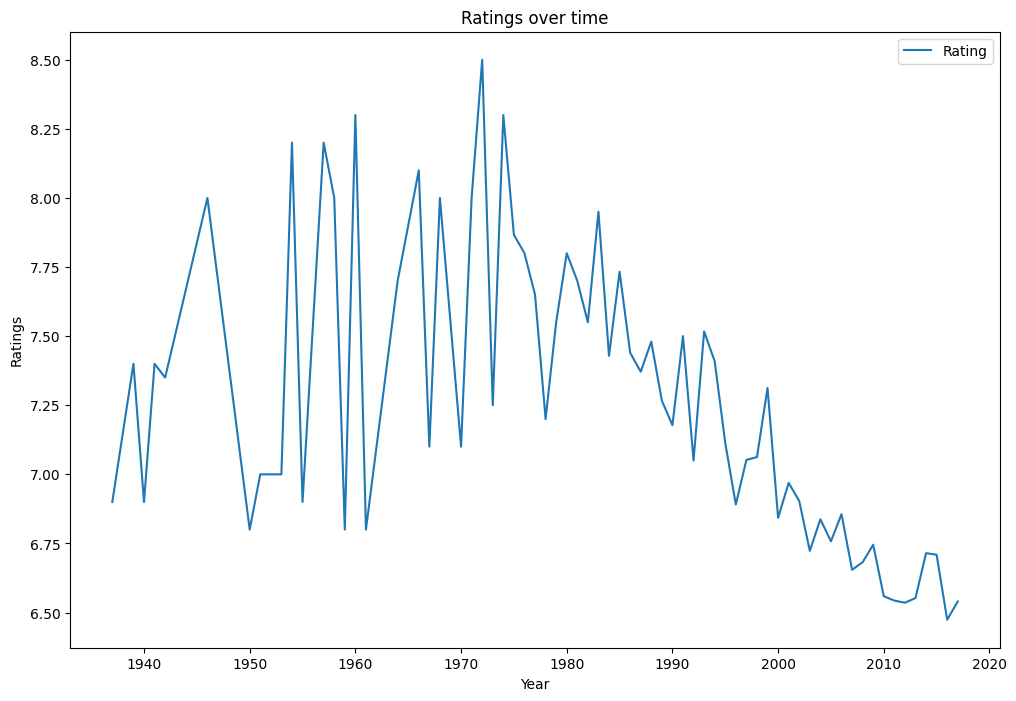

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(vote_by_year,label='Rating')

plt.legend()
plt.title('Ratings over time')
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.show()

### I was correct, there are some very "well rated" years in the time period I said, and it goes a little downhill from there. However, this could also be because more recent movies have higher vote counts, therefore values will likely be lower, so let's take look at that, and also confirm if 2013 is indeed the year with the most amount of movies.

In [ ]:
pop_by_year = popular_movies_df.groupby('year')['vote_count'].mean()

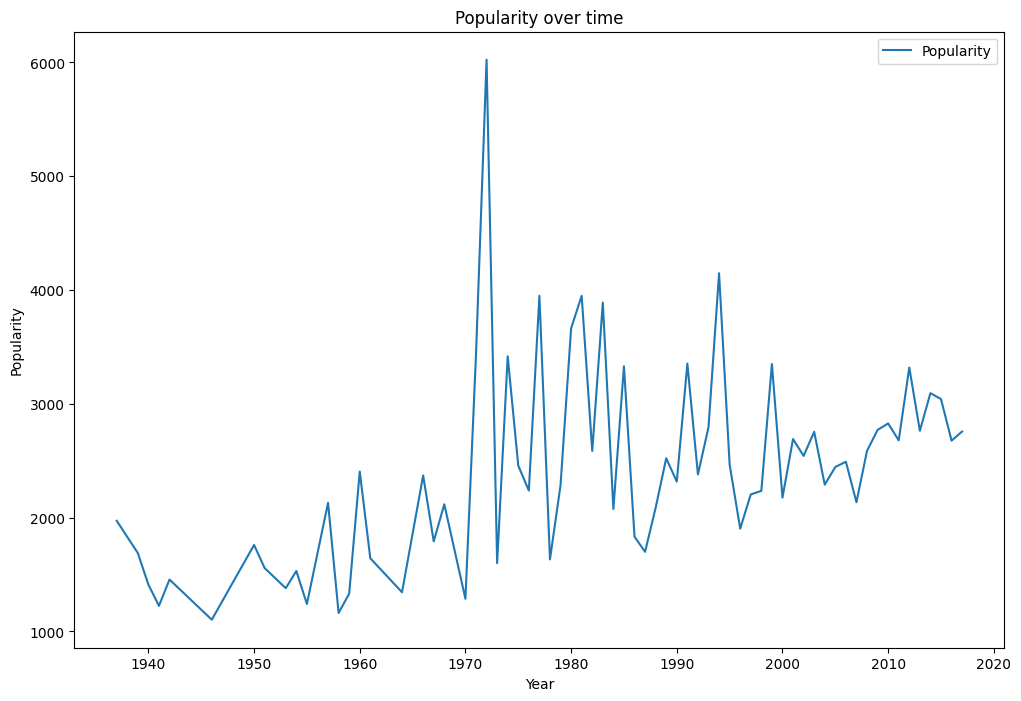

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(pop_by_year,label='Popularity')

plt.legend()
plt.title('Popularity over time')
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

### After the big spike just after 1970, we can see that the vote counts start increasing, so although those movies are rated lower, they also have more ratings, so a higher chance to be more accurate than others. And we can see that the quantity of movies made per year increases the popularity, because it averages the vote_count and because there are so many it is the highest.

### However, my conclusion from this data is that older movies are generally better than newer releases, and that movies in general have become more popular over time, which is great!

### Overall, I think I have been able to tell a story about movies and how much I enjoy them, while also answering my own questions about them. I now know that budget has a decent effect on quality, movies don't have to break the bank to produce quality, it is all about, the acting, the directing, the plot, etc. Now I can't really test those, but data analytics can't replicate what humans can feel and understand, I look at the data and take what I can from there. Also being old doesn't make a movie bad, but also some of my favourite movies are on the newer side. And it is also great to see that the popularity has expanded over the years, and hopefully more amazing movies keep coming. I am very excited to watch "Dune 2", since the first one was fantastic, and some other movies.